# Lista de Exercícios III

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 23/09/2020

In [2]:
from scipy.constants import h, k, hbar, c
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Primeiramente, vamos criar duas funções para calcular os pontos de integração e os pesos para aplicarmos na quadratura Gaussiana. Para isso, vamos determinar os zeros de $N-$ésima ordem do polinômio de Legendre usando o método de Newton.

A primeira função que iremos criar será a função `gaussxw(N)` que irá retornar os pontos de integração $x$, além disso a integração pondera $w$ tal que $\sum_i (w_{i}\cdot f(x_{i}))$ é a $N-$ésima ordem de aproximação gaussiana da integral $\int_{-1}^{1}f(x)dx$.

In [3]:
def gausswx(N):
    
    # Aproximação inicial das raízes do polinômio de Legendre.
    a = np.linspace(2,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Agora vamos achar as raízes usando o Método de Newton.
    epsilon = 1e-15
    delta = 1.0
    
    while delta > epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        
        for i in range(1,N):
            p0,p1 = p1,((2*i+1)*x*p1-i*p0)/(i+1)
            
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
        
    # Por fim vamos calcular os pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x,w

Nossa segunda função será a função `gaussxwab(N,a,b)`, com ela iremos determinar os pesos e os pontos de integração mapeados para o intervalo $[a,b]$, de modo que $\sum_{i}(w_{i}\cdot f(x_{i}))$ é a $N-$ésima aproximação Gaussiana da integral $\int_{a}^{b}f(x)dx$.

In [4]:
def gaussxwab(N,a,b):
    x,w = gausswx(N)
    
    return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w

Agora estamos aptos para definir a função `cv(T)` que irá calcular o $C_{V}$ para uma dada temperatura de uma certa amostra considerando as características fornecidas no enunciado do item, onde $C_{V}$ é dado pela equação abaixo:

$$C_{V}=9V\rho k_{B}\Bigg(\frac{T}{\theta_{D}}\Bigg)^{3}\int_{D}^{\frac{\theta_{D}}{T}}\frac{x^{4}e^{x}}{(e^{x}-1)^{2}}dx$$

As características que iremos levar em consideração serão que a amostra terá 1000 $cm^{3}$ de alumínio (Al) sólido, possui uma densidade $\rho=6.022\cdot 10^{28}m^{-3}$ e uma temperatura de Debye de $\theta_{D}=428$ $K$. Para a resolução de nossa integral vamos usar um número de pontos $N=50$ pontos.

In [5]:
def cv(T):
    c = 7.48279   # = 9V * rho * k_B (unidades do SI)
    theta_d = 428 # [theta_d] = K
    
    def f(x):
        return x**4*np.exp(x)/(np.exp(x)-1)**2
    
    # Agora vamos realizar a integração usando a quadratura Gaussiana.
    N = 50
    x,w = gaussxwab(N,0,theta_d/T)
    integral = 0.0
    
    for i in range(N):
        integral += w[i]*f(x[i])
        
    return c*(T/theta_d)**3*integral

### Letra b)

Agora vamos usar a nossa função `cv(T)` definida no item anterior para para plotar um gráfico do calor específico $C_{V}$ em função da temperatura $T$ no intervalo fechado $T\in[5,500]$. Obviamente, $[T]=K$.

Mas antes disso, vamos criar uma função chamada `opt_plot` com o intuito de melhorar a estética dos plots.

In [6]:
def opt_plot():
        plt.minorticks_on()
        plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
        plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Agora vamos ao plot...

<IPython.core.display.Javascript object>


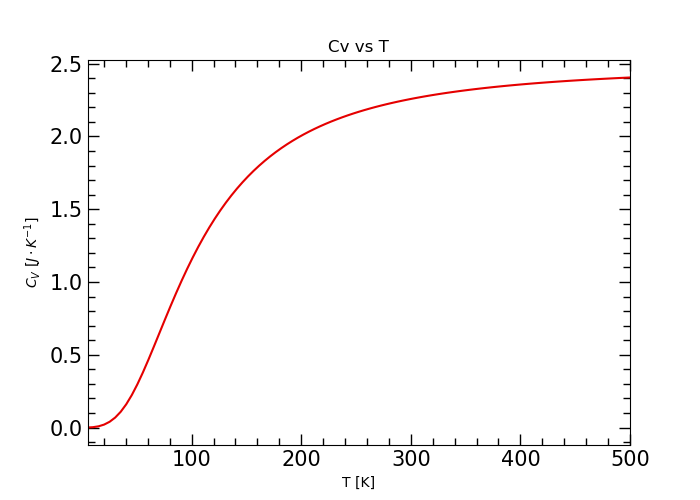

In [7]:
T = np.linspace(5,500,99)
C = list(map(cv,T))

plt.figure(figsize=(7,5))
plt.plot(T, C, color='xkcd:red',label=r'$C_{V}$')
plt.title('Cv vs T')
plt.xlim(5,500)
plt.xlabel('T [K]')
plt.ylabel(r'$C_{V}$ $[J\cdot K^{-1}]$')
opt_plot()

$\text{ }$

## Problema 2

### Letra a)

A teoria de Planck da radiação térmica nos diz que no intervalo de frequência angular $[\nu,\nu_d\nu]$, um corpo negro de área unitária irradia eletromagneticamente uma quantidade de energia térmica, por unidade de tempo (segundo), igual a $I(\omega)d\omega$, onde

$$I(\omega)=\frac{\hbar}{4\pi^{2}c^{2}}\frac{\omega^{3}}{(e^{\hbar\omega/k_{B}T}-1)}$$

Agora vamos derivar a taxa total na qual a energia é irradiada por um corpo negro por unidade de área, em todas as frequências.

Seja $x=\frac{\hbar\omega}{k_{B}T}$, substituindo em $I(\omega)$ e multiplicando ambos os lados por $d\omega$ vem

$$I(\omega)d\omega=\frac{\hbar k_{B}^{3}T^{3}}{4\pi^{2}c^{2}\hbar^{3}}\frac{x^{3}}{(e^{x}-1)}d\omega$$

Subsituindo agora $d\omega=\frac{k_{B}T}{\hbar}dx$ 

$$I(\omega)d\omega=\frac{k_{B}^{3}T^{3}}{4\pi^{2}c^{2}\hbar^{2}}\frac{x^{3}}{(e^{x}-1)}dx$$

Integrando ambos os lados obtemos a taxa total na qual a energia é irradiada por um corpo negro, por unidade de área, em todas as frequências

$$W=\frac{k_{B}^{4}T^{4}}{4\pi^{2}c^{2}\hbar^{3}}\int_{0}^{\infty}\frac{x^{3}}{(e^{x}-1)}dx$$

$\square$

### Letra b)

Vamos usar a quadratura Gaussiana para avaliar a integral abordada no item anterior. Escolheremos a quadratura Gaussiana primeiramente porque é um método de fácil implementação computacional e segundo que não é preciso necessariamente um espaçamento igual.

Para um `range` indo de 0 até $\infty$, nós iremos realizar a substituição

$$x=\frac{z}{1-z}\implies dx=\frac{dz}{(1-z^{2})}$$

Agora vamos calcular a integral dentro de $W$ usando um número de pontos $N=50$ pontos.

In [8]:
def f(z):
    return (z/(1-z))**3/(np.exp(z/(1-z))-1)*1/(1-z)**2

N = 50
x, w = gaussxwab(N, 0, 1)
integral = 0.0

for i in range(1, N):
    integral += w[i]*f(x[i])

print(integral)

6.4939394005148845


### Letra c)

Agora vamos estimar o valor numérica da constante de Stefan-Boltzmann ($\sigma$).

In [9]:
integral = 6.4939394005148845      # Valor aproximado da integral calculada no item anterior

S_B = k**4/(4*np.pi**2*c*c*hbar**3)*integral

Vamos ver o valor de nossa aproximação...

In [10]:
print(r'Constante de Stefan-Boltzmann : ', S_B, ' J/(m**2 * K**4).')

Constante de Stefan-Boltzmann :  5.670374417654669e-08  J/(m**2 * K**4).


Note que obtemos uma precisão de até casa decimais, ou seja, conseguimos realizar uma boa aproximação para $\sigma$.

$\text{}$

## Problema 3

### Letra a)

Sabemos que a força gravitacional é descrita pela Lei da Gravitação Universal de Newton que diz que para dois corpos pontuais de massas $M$ e $m$ separados por uma distância $r$

$$\overrightarrow{\textbf{F}}=G\frac{mM}{r^{3}}\overrightarrow{\textbf{r}}$$

onde $\overrightarrow{\textbf{r}}$ é o vetor deslocamento e que possui módulo $|\overrightarrow{\textbf{r}}|=\sqrt{x^{2}+y^{2}+z^{2}}$.

Considerando um elemento infinitesimal de massa $dm=\sigma dA=\sigma dxdy$ como sendo uma partícula pontual na folha podemos escrever

$$d\overrightarrow{\textbf{F}}=GM\frac{\sigma dxdy}{(x^{2}+y^{2}+y^{2})^{3/2}}\overrightarrow{\textbf{r}}$$

Agora, basta realizar o produto escalar de $d\overrightarrow{\textbf{F}}$ com o versor $\overrightarrow{\textbf{k}}$:

$$dF_{z}=\sigma GM\frac{|r|\cos{\theta} dxdy}{(x^{2}+y^{2}+y^{2})^{3/2}}$$

Mas $\cos{\theta}=\frac{z}{\sqrt{x^{2}+y^{2}+y^{2}}}$ (eixo azimutal, ou $Oz$), logo

$$dF_{z}=\sigma GM\frac{zdxdy}{(x^{2}+y^{2}+y^{2})^{3/2}}$$

Aplicando o princípio da superposição, integrando de $-\frac{L}{2}$ até $\frac{L}{2}$ e substituindo $M=1kg$ vem:

$$F_{z}=G\sigma z\int\int_{\frac{L}{2}}^{\frac{L}{2}}\frac{dxdy}{(x^{2}+y^{2}+y^{2})^{3/2}}$$

$\square$

### Letra b)

Vamos começar definindo as constantes $G$ e $\sigma$:

In [11]:
G = 6.674*10**-11  # Constante gravitacional de Newton
sigma = 100        # Densidade de massa

Agora vamos definir o número de pontos $N$ e os parâmetros para a quadratura Gaussiana:

In [12]:
N = 100
r,w = gaussxwab(N,-5,5)

Agora definimos a função `Fz(z)` que irá calcular força gravitacional devido a placa sentida por um ponto de massa 1 kg, situado a uma distância $z$ do centro do quadrado, em uma direção perpendicular a folha:

In [13]:
def Fz(z):
    def integrand(x,y,z):
        return 1/(x**2+y**2+z**2)**(3/2)
    
    integral = 0
    for i in range(N):
        for j in range(N):
            integral += w[i]*w[j]*z*integrand(r[i],r[j],z)
            
    return G*sigma*integral

Agora definimos os valores para o plot:

In [14]:
z_values = np.linspace(0,10,100)
F_z_values = list(map(Fz,z_values))

Por fim, vamos plotar a curva $F_{z}$ vs $z$:

<IPython.core.display.Javascript object>


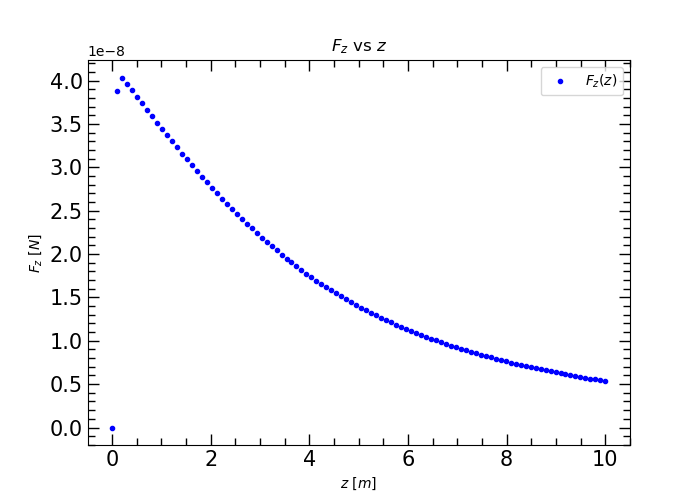

In [15]:
plt.figure(figsize=(7,5))

plt.plot(z_values,F_z_values,'b.',label=r'$F_{z}(z)$')
plt.title(r'$F_{z}$ vs $z$')
plt.xlabel(r'$z$ $[m]$')
plt.ylabel(r'$F_{z}$ $[N]$')
plt.legend(loc='best')
opt_plot()

$\textbf{OBS}$: Optei por usar pontos ao invés de uma reta no plot pelo fato de se tornar mais fácil a visualização dos pontos discrepantes, mais fácil no sentido de que é de uma maior facilidade achar o ponto exato onde está ocorrendo a discrepância. Além disso, com esse tipo de gráfico também se pode ver mais facilmente a convergência do valor da integral.

### Letra c)

Ao analisar o gráfico acima, nota-se que a força parece tender a zero para pequenos valores de $z$. Isso ocorre pelo fato de o integrando se tornar muito pequeno para pontos distantes de $(x,y)=(0,0)$, e não se tem pontos sufcientes perto da origem $O(0,0)$ ao se calcular a integral.

$\text{}$